
Updated ANOVA Table for Training Day Errors with Effect Size:
                           sum_sq    df         F    PR(>F)    eta_sq
C(AD_Status)                3.025   1.0  1.216080  0.278356  0.025214
C(Treatment)               28.275   3.0  3.788945  0.019678  0.235674
C(AD_Status):C(Treatment)   9.075   3.0  1.216080  0.319771  0.075641
Residual                   79.600  32.0       NaN       NaN  0.663472

Updated ANOVA Table for Memory Day Errors with Effect Size:
                            sum_sq    df          F        PR(>F)    eta_sq
C(AD_Status)               189.225   1.0  75.313433  6.449421e-10  0.646315
C(Treatment)                14.475   3.0   1.920398  1.461176e-01  0.049441
C(AD_Status):C(Treatment)    8.675   3.0   1.150912  3.436263e-01  0.029630
Residual                    80.400  32.0        NaN           NaN  0.274614

Assumption Checks for Training Day Errors:
Shapiro-Wilk Test for Normality: W=0.9635688662528992, p=0.2214137762784958
Levene's Test for Homogene

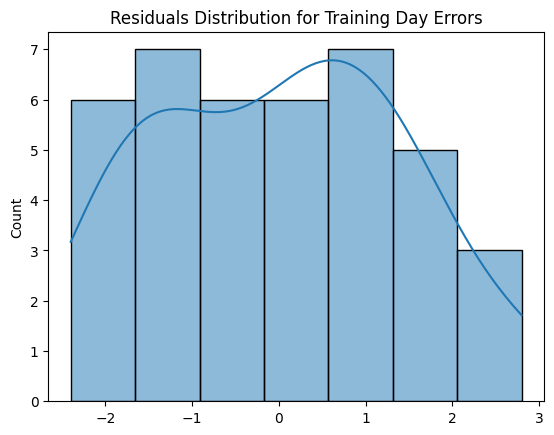

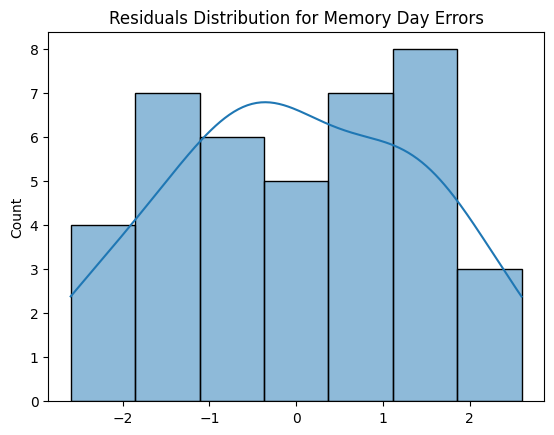


Descriptive Statistics for Training Day Errors:
                     count  mean       std   min   25%   50%   75%   max
AD_Status Treatment                                                     
1         1            5.0  13.2  1.303840  12.0  12.0  13.0  14.0  15.0
          2            5.0  15.8  1.303840  14.0  15.0  16.0  17.0  17.0
          3            5.0  15.2  1.923538  13.0  14.0  15.0  16.0  18.0
          4            5.0  13.6  1.140175  12.0  13.0  14.0  14.0  15.0
2         1            5.0  15.4  1.816590  13.0  14.0  16.0  17.0  17.0
          2            5.0  15.8  1.788854  14.0  14.0  16.0  17.0  18.0
          3            5.0  15.2  1.923538  13.0  14.0  15.0  16.0  18.0
          4            5.0  13.6  1.140175  12.0  13.0  14.0  14.0  15.0

Descriptive Statistics for Memory Day Errors:
                     count  mean       std   min   25%   50%   75%   max
AD_Status Treatment                                                     
1         1            5.0  

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('D:/desktop/Alzheimers Mice Data.csv')  # Replace with the actual path to your data

# Create a 'group' column for Levene's test
data['group'] = data['AD_Status'].astype(str) + "_" + data['Treatment'].astype(str)

# Define the model for 2-Factor ANOVA for Training Day errors
model_training = ols('Training ~ C(AD_Status) * C(Treatment)', data=data).fit()
anova_results_training = sm.stats.anova_lm(model_training, typ=2)

# Define the model for 2-Factor ANOVA for Memory Day errors
model_memory = ols('Memory ~ C(AD_Status) * C(Treatment)', data=data).fit()
anova_results_memory = sm.stats.anova_lm(model_memory, typ=2)

# Function to perform Levene's test for each combination of groups
def levene_test(data, dependent):
    groups = data.groupby('group')[dependent].apply(list)
    return stats.levene(*groups)

# Check the assumptions of ANOVA for Training and Memory Day errors
normality_training = stats.shapiro(model_training.resid)
homogeneity_training = levene_test(data, 'Training')
normality_memory = stats.shapiro(model_memory.resid)
homogeneity_memory = levene_test(data, 'Memory')

# Calculate effect size (Partial Eta Squared)
anova_results_training['eta_sq'] = anova_results_training['sum_sq'] / (anova_results_training['sum_sq'].sum())
anova_results_memory['eta_sq'] = anova_results_memory['sum_sq'] / (anova_results_memory['sum_sq'].sum())

# Output the ANOVA table with effect sizes
print("\nUpdated ANOVA Table for Training Day Errors with Effect Size:")
print(anova_results_training)
print("\nUpdated ANOVA Table for Memory Day Errors with Effect Size:")
print(anova_results_memory)

# Assumption checks outputs
print("\nAssumption Checks for Training Day Errors:")
print(f"Shapiro-Wilk Test for Normality: W={normality_training[0]}, p={normality_training[1]}")
print(f"Levene's Test for Homogeneity of Variances: F={homogeneity_training[0]}, p={homogeneity_training[1]}")

print("\nAssumption Checks for Memory Day Errors:")
print(f"Shapiro-Wilk Test for Normality: W={normality_memory[0]}, p={normality_memory[1]}")
print(f"Levene's Test for Homogeneity of Variances: F={homogeneity_memory[0]}, p={homogeneity_memory[1]}")

# Plot the residuals for visual check of normality
sns.histplot(model_training.resid, kde=True)
plt.title('Residuals Distribution for Training Day Errors')
plt.show()

sns.histplot(model_memory.resid, kde=True)
plt.title('Residuals Distribution for Memory Day Errors')
plt.show()

# Descriptive statistics for Training and Memory Day errors
descriptives_training = data.groupby(['AD_Status', 'Treatment']).Training.describe()
descriptives_memory = data.groupby(['AD_Status', 'Treatment']).Memory.describe()

print("\nDescriptive Statistics for Training Day Errors:")
print(descriptives_training)
print("\nDescriptive Statistics for Memory Day Errors:")
print(descriptives_memory)
